In [1]:
import json
import umap
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
from scipy.stats import zscore
from scipy.spatial.distance import cdist
import collections
import matplotlib.pyplot as plt

In [2]:
with open("criminal-index-export.json", "r") as read_file:
    my_json = json.load(read_file)

my_list = []
y = []

for key, value in my_json['rio_grande_do_sul'].items():
    my_list.append(value['2018'])
    y.append(key)

x = pd.DataFrame.from_records(my_list)    
y = pd.DataFrame(y)
x['City'] = y

x.set_index(['City'], inplace=True)
x.drop(['TOTAL'], inplace=True)

In [3]:
x = (x / 1000)
x = x.apply(zscore)

## Utilizando KMeans com inicialização otimizada em tempo (padrão)

In [4]:
x.head(5)

Delitos Relacionados à Armas e Munições   Entorpecentes - Posse  \
City                                                                           
ACEGUA                                     -0.265157               -0.389038   
AGUA SANTA                                 -0.265157               -0.389038   
AGUDO                                      -0.030120               -0.155896   
AJURICABA                                  -0.115588               -0.339079   
ALECRIM                                     0.033981               -0.272467   

             Entorpecentes - Tráfico   Estelionato    Furtos  \
City                                                           
ACEGUA                     -0.212256     -0.165600 -0.167191   
AGUA SANTA                 -0.203030     -0.161758 -0.191585   
AGUDO                      -0.073864     -0.107980 -0.122338   
AJURICABA                  -0.203030     -0.142552 -0.171125   
ALECRIM                    -0.138447     -0.138711 -0.153814   

             Homicídio  Doloso   Latrocínio   Roubo de Veículo    Roubos  \
City                                                                       
ACEGUA               -0.138017     -0.22435          -0.082995 -0.100110   
AGUA SANTA           -0.180682     -0.22435          -0.080351 -0.103672   
AGUDO                -0.095353     -0.22435          -0.085638 -0.100110   
AJURICABA            -0.138017     -0.22435          -0.085638 -0.103672   
ALECRIM              -0.138017     -0.22435          -0.085638 -0.101535   

             Veículo  Abigeato*  Total de vítimas de Homicidio Doloso  
City                                                                   
ACEGUA     -0.179542   0.165463                             -0.136703  
AGUA SANTA -0.166721  -0.441109                             -0.173945  
AGUDO      -0.179542  -0.067834                             -0.099461  
AJURICABA  -0.173131  -0.347790                             -0.136703  
ALECRIM    -0.179542   0.258781                             -0.136703

In [5]:
# model_6_centroids = KMeans(n_clusters=6, max_iter=1000).fit(x)
# result_6_centroids = model_6_centroids.predict(x)
# counter_6_centroids = collections.Counter(result_6_centroids)
# print(counter_6_centroids)

In [6]:
# model_7_centroids = KMeans(n_clusters=7, max_iter=1000).fit(x)
# result_7_centroids = model_7_centroids.predict(x)
# counter_7_centroids = collections.Counter(result_7_centroids)
# print(counter_7_centroids)

In [7]:
# model_8_centroids = KMeans(n_clusters=8, max_iter=1000).fit(x)
# result_8_centroids = model_8_centroids.predict(x)
# counter_8_centroids = collections.Counter(result_8_centroids)
# print(counter_8_centroids)

In [8]:
result_umap = umap.UMAP(n_neighbors=15).fit_transform(x)
result_umap = pd.DataFrame(result_umap)
result_umap.columns = ['x', 'y']

In [9]:
cities = pd.DataFrame(x.index.values)
cities.columns = ['City']

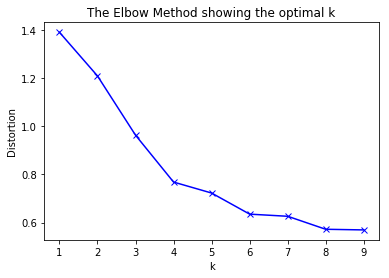

In [10]:
distortions_all = []
K = range(1, 10)
for k in K:
    model_all = KMeans(n_clusters=k, max_iter=1000).fit(x)
    distortions_all.append(sum(np.min(cdist(x, model_all.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])
    
plt.plot(K, distortions_all, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
model = KMeans(n_clusters=4, max_iter=1000).fit(x)
result_4_centroids = model.predict(x)

result = pd.DataFrame(result_4_centroids)
result.columns = ['Label']

In [12]:
frames = [cities, result_umap, result]
final = pd.concat(frames, axis=1)

In [20]:
final = final.set_index('City')

In [13]:
final.to_csv("clustering_criminal_data.csv", index=False)

In [22]:
final.to_json(r'clustering_criminal_data.json', orient='index')

In [21]:
final.index

Index(['ACEGUA', 'AGUA SANTA', 'AGUDO', 'AJURICABA', 'ALECRIM', 'ALEGRETE',
       'ALEGRIA', 'ALMIRANTE TAMANDARE DO SUL', 'ALPESTRE', 'ALTO ALEGRE',
       ...
       'VILA FLORES', 'VILA LANGARO', 'VILA MARIA', 'VILA NOVA DO SUL',
       'VISTA ALEGRE', 'VISTA ALEGRE DO PRATA', 'VISTA GAUCHA',
       'VITORIA DAS MISSOES', 'WESTFALIA', 'XANGRI-LA'],
      dtype='object', name='City', length=498)